In [33]:
# Nell'importare pandas imposto l'opzione per visualizzare
# i dati numerici con due cifre dopo la virgola.
# Questo perché più avanti darà fastidio visualizzarli in
# notazione scientifica e in più con molte cifre dopo la virgola.
# Per farlo si usa l'API di configurazione di pandas, passando come
# primo argomento la stringa 'display.float_format'.
# Il secondo argomento in questo caso deve essere un oggetto 'callable'
# che accetti in ingresso un dato di tipo float e restituisca una stringa.
# Per ottenere questo risultato usiamo una funzione lambda e usiamo
# la formattazione di stringa passando la x alla formattazione '%.2f'
# ricordando la seguente regola di formattazione:
# '%.<numero di cifre>f' - Numeri in vigola mobile con un un numero fisso di cifre decimali.

In [36]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# I dataset sono in formato '.tsv' (Tab Separated Values)
# quindi nell'import con pandas ho bisogno
# di dichiarare il separatore '\t'.
# Inoltre inserisco io il parametro 'low_memory=False'
# perché senza mi appare un warning relativo a 'mixed type' sulla 4a colonna.

In [12]:
basics = pd.read_csv('title.basics.tsv.gz', sep='\t', low_memory=False)

In [13]:
basics.sample(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
5774388,tt22481328,tvEpisode,Episode #3.144,Episode #3.144,0,2018,\N,\N,Talk-Show
5298649,tt20779758,tvEpisode,Episode #1.541,Episode #1.541,0,2022,\N,\N,Drama
2929869,tt13580748,tvEpisode,Diuretic Effect!,Diuretic Effect!,0,2020,\N,\N,"Animation,Comedy,Drama"
4022202,tt15589128,tvEpisode,8. februar 2010,8. februar 2010,0,2010,\N,\N,News
6703716,tt3254352,short,Do I Not Matter?,Do I Not Matter?,0,2013,\N,12,"Documentary,Short"
654395,tt0677062,tvEpisode,Episode dated 18 August 2003,Episode dated 18 August 2003,0,2003,\N,\N,"Drama,Fantasy,Romance"
8045561,tt6296202,tvEpisode,Episode #1.1,Episode #1.1,0,1988,\N,\N,"Drama,Romance"
2925163,tt13572252,tvEpisode,Feminsin vs Traditional,Feminsin vs Traditional,0,2016,\N,\N,Talk-Show
6561620,tt2915640,tvEpisode,Infiltration,Infiltration,0,\N,\N,\N,"Animation,Sci-Fi"
3996365,tt15542696,tvEpisode,Episode #1.2862,Episode #1.2862,0,\N,\N,\N,Family


In [ ]:
# Vediamo che tipo di oggetto è 'basics'.

In [15]:
type(basics)

pandas.core.frame.DataFrame

In [ ]:
# E' un oggetto 'Dataframe' di pandas, ovvero un tabulato.
# Un tabulato è una tabella, comprese le intestazioni.
# Le singole colonne invece sono chiamate 'Series'.
# Qui prendiamo ad esempio la colonna 'startYear' e guardiamola.

In [16]:
basics['startYear']

0          1894
1          1892
2          1892
3          1892
4          1893
           ... 
9699582    2010
9699583    2010
9699584    2010
9699585    2015
9699586    2014
Name: startYear, Length: 9699587, dtype: object

In [ ]:
# Qui sotto andiamo a vedere quanti film sono contenuti
# nel database attraverso la funzione 'len' applicata al dataframe.
# (La lunghezza si poteva già leggere nella stampata precedente)

In [17]:
len(basics)

9699587

In [ ]:
# Ora andiamo a creare un array che ci servirà a
# filtrare i film selezionando soltanto quelli di tipo 'movie'.

In [21]:
movie_filter = basics['titleType'] == 'movie'
movie_filter

0          False
1          False
2          False
3          False
4          False
           ...  
9699582    False
9699583    False
9699584    False
9699585    False
9699586    False
Name: titleType, Length: 9699587, dtype: bool

In [ ]:
# Ora applico il filtro al dataframe di partenza.
# In questo modo ottengo un dataframe che ha soltanto le righe
# corrispondenti ai film di tipo 'movie'.

In [25]:
basics_movies = basics[movie_filter]
basics_movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
...,...,...,...,...,...,...,...,...,...
9699478,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
9699505,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
9699517,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
9699527,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N


In [29]:
# Come vediamo il dataframe 'basics_movies' ha soltanto 639056 film
# tutti di tipo 'movie'.
# Adesso importiamo il dataset contenente i voti dei film.

In [30]:
ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t', low_memory=False)
ratings.sample(10)

,tconst,averageRating,numVotes
1242319,tt8545636,4.2,555
865342,tt2249084,8.2,8
1120651,tt5971126,7.1,17
473490,tt10507902,3.9,110
1253107,tt8847756,7.5,7
1090102,tt5479024,8.8,6
1074767,tt5212166,7.1,47
109643,tt0158559,5.5,155
880224,tt2338847,8.0,5
99026,tt0137892,5.6,47


In [ ]:
# Vediamo una ricapitolazione del dataframe con il metodo 'describe()'
# il quale fornisce alcune caratteristiche descrittive delle colonne.

In [43]:
ratings.describe()

,averageRating,numVotes
count,1290787.00,1290787.00
mean,6.95,1040.25
std,1.38,17395.59
min,1.00,5.00
25%,6.20,11.00
50%,7.10,26.00
75%,7.90,101.00
max,10.00,2714675.00


In [45]:
# E' interessante notare nella tabella qui sopra la differenza tra
# la media e la mediana, sia per la colonna 'media dei voti' che per la colonna 'numero di voti'.
# Ora chiedo a pandas di fare un grafico istogramma della 'media dei voti'.
# Imposto a mano le etichette degli assi per leggere meglio il grafico.

[Text(0.5, 0, 'voto medio'), Text(0, 0.5, 'quantità di film')]

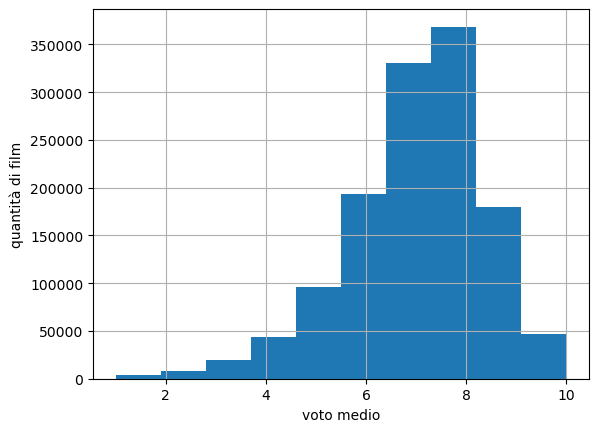

In [56]:
ratings['averageRating'].hist().set(xlabel='voto medio', ylabel='quantità di film')

In [ ]:
# Sulle ascisse abbiamo il voto, da 0 a 10.
# Sulle ordinate abbiamo l'ammontare dei film che hanno ottenuto x come media dei voti.
# Adesso stampo lo stesso istogramma per il numero di voti.
# Salvo l'istogramma in una variabile per poter applicare delle modifiche
# prima di stampare il grafico.
# Ho inserito il parametro 'ticklabel_format(style='plain')'
# per evitare che i valori sull'asse y fossero in notazione scientifica.

<AxesSubplot:xlabel='num. di recensioni', ylabel='q.tà di film'>

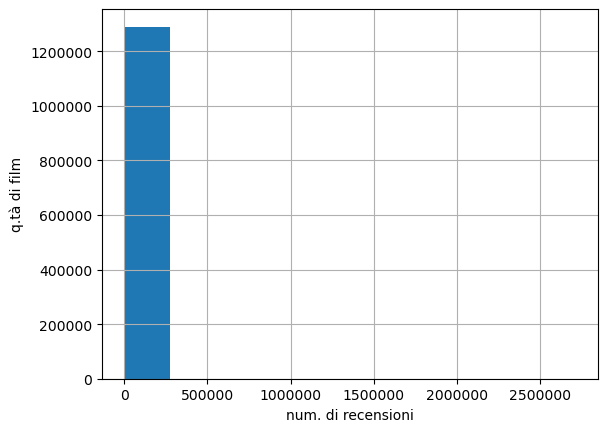

In [69]:
plot1 = ratings['numVotes'].hist()
plot1.ticklabel_format(style='plain')
plot1.set(xlabel='num. di recensioni', ylabel='q.tà di film')
plot1

In [ ]:
# Inserendo 'bins=100' nel metodo hist() forziamo pandas a disegnare 100
# barre invece che le 10 di default, allo scopo di vedere meglio come è
# distribuito il numero di voti.

[Text(0.5, 0, 'numero di recensioni'), Text(0, 0.5, 'quantità di film')]

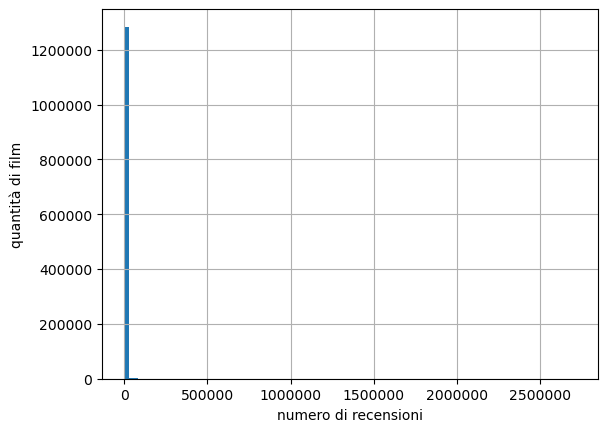

In [70]:
plot2 = ratings['numVotes'].hist(bins=100)
plot2.ticklabel_format(style='plain')
plot2.set(xlabel='numero di recensioni', ylabel='quantità di film')

In [72]:
# Come vediamo, anche restringendo  di molto l'ampiezza delle barre
# rimane una sola barra molto più alta delle altre, che a questo
# livello di zoom restano invisibili.
# Per osservare meglio i dati, impostiamo dei limiti sulla visualizzazione
# relativi agli assi.

(0.0, 100000.0)

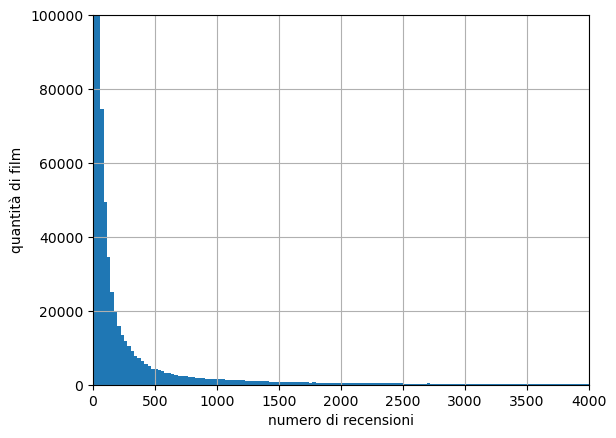

In [86]:
plot3 = ratings['numVotes'].hist(bins=100000)
plot3.set(xlabel='numero di recensioni', ylabel='quantità di film')
plot3.set_xlim(0, 4000)
plot3.set_ylim(0, 100000)

In [ ]:
# Questo grafico mostra che ci sono una miriade di film che hanno
# pochissime recensioni, al contempo ci sono pochissimi film
# che hanno una miriade di recensioni.

In [ ]:
# Il nostro scopo ora è individuare quei film che hanno un buon voto
# e allo stesso tempo un grande numero di recensioni.
# Per agevolare questa ricerca è utile scalare i dati
# in maniera tale che varino entrambi tra 0 e 1.
# Inoltre in questo caso può essere utile usare il logaritmo
# del 'numero dei voti' per addolcire la curva.
# Per farlo creo una nuova Series chiamata 'logNumVotes'
# usando la funzione log() di numpy.

In [90]:
ratings['logNumVotes'] = np.log(ratings['numVotes'])
ratings

,tconst,averageRating,numVotes,logNumVotes
0,tt0000001,5.70,1959,7.58
1,tt0000002,5.80,263,5.57
2,tt0000003,6.50,1798,7.49
3,tt0000004,5.60,179,5.19
4,tt0000005,6.20,2596,7.86
...,...,...,...,...
1290782,tt9916730,8.30,10,2.30
1290783,tt9916766,7.00,21,3.04
1290784,tt9916778,7.20,36,3.58
1290785,tt9916840,8.80,6,1.79


<AxesSubplot:>

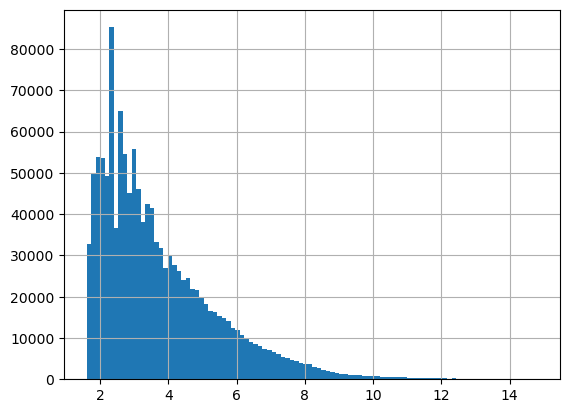

In [92]:
ratings['logNumVotes'].hist(bins=100)

In [93]:
# Come vediamo, adesso senza bisogno di limitare gli assi
# riusciamo ad osservare bene l'andamento della curva.
# Ora normalizziamo le Series. Per farlo, analizziamo prima
# i valori massimi delle Series.

In [94]:
ratings.max()

tconst           tt9916880
averageRating        10.00
numVotes           2714675
logNumVotes          14.81
dtype: object

In [ ]:
# *** Le seguenti operazioni le ho fatte io perché ero curioso di trovare
# il titolo del film avente il maggior numero di recensioni.

In [96]:
filtro = ratings['numVotes'] == 2714675
ratings[filtro]

,tconst,averageRating,numVotes,logNumVotes
82422,tt0111161,9.30,2714675,14.81


In [99]:
basics_movies[basics_movies['tconst'] == 'tt0111161']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
108666,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama


In [ ]:
# Film trovato. Adesso torno a seguire le istruzioni di Savastano. ***

# Divido i valori della Series 'averageRatings' per il massimo della stessa Series.
# In questo modo ottengo una normalizzazione di tutti i voti della tabella
# che varieranno tra 0 e 1.

In [100]:
ratings['averageRating'] /= ratings['averageRating'].max()
ratings

,tconst,averageRating,numVotes,logNumVotes
0,tt0000001,0.57,1959,7.58
1,tt0000002,0.58,263,5.57
2,tt0000003,0.65,1798,7.49
3,tt0000004,0.56,179,5.19
4,tt0000005,0.62,2596,7.86
...,...,...,...,...
1290782,tt9916730,0.83,10,2.30
1290783,tt9916766,0.70,21,3.04
1290784,tt9916778,0.72,36,3.58
1290785,tt9916840,0.88,6,1.79


In [ ]:
# Effettuo la stessa operazione sulla Series 'logNumVotes'.

In [101]:
ratings['logNumVotes'] /= ratings['logNumVotes'].max()
ratings

,tconst,averageRating,numVotes,logNumVotes
0,tt0000001,0.57,1959,0.51
1,tt0000002,0.58,263,0.38
2,tt0000003,0.65,1798,0.51
3,tt0000004,0.56,179,0.35
4,tt0000005,0.62,2596,0.53
...,...,...,...,...
1290782,tt9916730,0.83,10,0.16
1290783,tt9916766,0.70,21,0.21
1290784,tt9916778,0.72,36,0.24
1290785,tt9916840,0.88,6,0.12


In [102]:
ratings.describe()

,averageRating,numVotes,logNumVotes
count,1290787.00,1290787.00,1290787.00
mean,0.69,1040.25,0.25
std,0.14,17395.59,0.12
min,0.10,5.00,0.11
25%,0.62,11.00,0.16
50%,0.71,26.00,0.22
75%,0.79,101.00,0.31
max,1.00,2714675.00,1.00


In [ ]:
# Aggiungo una colonna 'PolloRating' contenente il prodotto
# di 'averageRating' e 'logNumVotes', precedentemente normalizzati.

In [103]:
ratings['PolloRating'] = ratings['averageRating'] * ratings['logNumVotes']
ratings

,tconst,averageRating,numVotes,logNumVotes,PolloRating
0,tt0000001,0.57,1959,0.51,0.29
1,tt0000002,0.58,263,0.38,0.22
2,tt0000003,0.65,1798,0.51,0.33
3,tt0000004,0.56,179,0.35,0.20
4,tt0000005,0.62,2596,0.53,0.33
...,...,...,...,...,...
1290782,tt9916730,0.83,10,0.16,0.13
1290783,tt9916766,0.70,21,0.21,0.14
1290784,tt9916778,0.72,36,0.24,0.17
1290785,tt9916840,0.88,6,0.12,0.11


<AxesSubplot:>

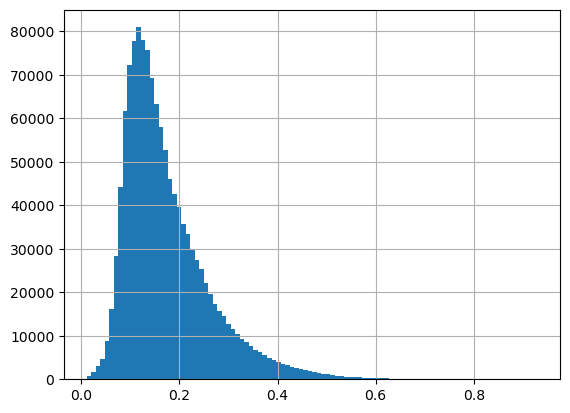

In [105]:
ratings['PolloRating'].hist(bins=100)

In [106]:
# Faccio il merge dei due database scaricati da IMDB
# utilizzando come riferimento la Series 'tconst'
# cioè il codice identificativo dei film.

In [109]:
rated_movies = basics_movies.merge(ratings, on='tconst')
rated_movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,logNumVotes,PolloRating
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,0.53,204,0.36,0.19
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",0.53,465,0.41,0.22
2,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,0.41,15,0.18,0.07
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",0.60,819,0.45,0.27
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,0.44,20,0.20,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288761,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,0.58,1404,0.49,0.28
288762,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History",0.64,5233,0.58,0.37
288763,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",0.38,14,0.18,0.07
288764,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,\N,123,Drama,0.83,6,0.12,0.10


In [110]:
# Ora devo individuare tutti i film di fantascienza.
# Alcuni film però hanno più di un genere, quindi prima
# di cercare mi conviene visualizzare i diversi modi in cui
# vengono raggruppati i generi.

# *** Provo a farlo da solo. Poi verifico se Savastano fa come me.

# Uso il metodo 'unique()' e salvo la lista in una variabile.

In [120]:
genres_list = rated_movies['genres'].unique().tolist()
len(genres_list)

1287

In [ ]:
# Stampando questa lista si osserva un serie lunghissima di valori
# unici, dati dalle numerosissime combinazioni possibili di generi (1287 combinazioni).
# Devo trovare un modo per individuare quei valori unici che contengono
# la parola 'Sci-Fi'.

In [223]:
sci_fi_unique_list = []

for i in range(len(genres_list)) :
    if 'Sci-Fi' in genres_list[i]:
        sci_fi_unique_list.append(genres_list[i])

sci_fi_unique_values = pd.Series(sci_fi_unique_list)
sci_fi_unique_values

0                         Sci-Fi
1                   Drama,Sci-Fi
2            Drama,Horror,Sci-Fi
3        Action,Adventure,Sci-Fi
4                  Horror,Sci-Fi
                 ...            
136      History,Sci-Fi,Thriller
137            Horror,Sci-Fi,War
138       Musical,Mystery,Sci-Fi
139       Family,Sci-Fi,Thriller
140    Documentary,Family,Sci-Fi
Length: 141, dtype: object

In [151]:
# Come vediamo ci sono 141 combinazioni in cui appare 'Sci-Fi'.
# Posso creare un filtro per ogni combinazione, e poi applicarlo al dataframe.

In [225]:
sci_fi_filters_list = []

for i in range(len(sci_fi_unique_values)):
    sci_fi_filters_list.append(rated_movies['genres'] == sci_fi_unique_values[i])
    
sci_fi_filter = np.empty(288766, dtype='bool')

for i in range(len(sci_fi_filter)):
    sci_fi_filter[i] = False

for i in range(len(sci_fi_filters_list)):
    for j in range(len(sci_fi_filters_list[i])):
        if sci_fi_filters_list[i][j] and not sci_fi_filter[j]:
            sci_fi_filter[j] = True
    
sci_fi_filter

array([False, False, False, ..., False, False, False])

In [235]:
sci_fi_filter_pd = pd.Series(sci_fi_filter)
sci_fi_filter_pd.unique()

array([False,  True])

In [236]:
sci_fi_movies = rated_movies[sci_fi_filter_pd]
sci_fi_movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,logNumVotes,PolloRating
54,tt0001993,movie,L'électrocuté,L'électrocuté,0,1911,\N,\N,Sci-Fi,0.41,22,0.21,0.09
284,tt0004974,movie,The Black Box,The Black Box,0,1915,\N,195,"Drama,Sci-Fi",0.28,27,0.22,0.06
357,tt0005615,movie,Life Without Soul,Life Without Soul,0,1915,\N,70,"Drama,Horror,Sci-Fi",0.65,56,0.27,0.18
432,tt0006333,movie,"20,000 Leagues Under the Sea","20,000 Leagues Under the Sea",0,1916,\N,85,"Action,Adventure,Sci-Fi",0.61,1875,0.51,0.31
513,tt0006820,movie,"Homunculus, 1. Teil","Homunculus, 1. Teil",0,1916,\N,69,"Horror,Sci-Fi",0.59,102,0.31,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288531,tt9867616,movie,Almost Human,Almost Human,0,2019,\N,46,"Documentary,Sci-Fi",0.67,268,0.38,0.25
288557,tt9874290,movie,Star Trek: Incident at Beta 9,Star Trek: Incident at Beta 9,0,2002,\N,57,Sci-Fi,0.57,8,0.14,0.08
288638,tt9890758,movie,Ultraman R/B: Select! The Crystal of Bond,Gekijôban Urutoraman Rûbu: Serekuto! Kizuna no...,0,2019,\N,72,"Action,Sci-Fi",0.74,91,0.30,0.23
288671,tt9896768,movie,The Immortal Wars: Rebirth,The Immortal Wars: Rebirth,0,2020,\N,\N,Sci-Fi,0.44,114,0.32,0.14


In [238]:
len(sci_fi_movies['genres'].unique())

141

In [ ]:
# Bene! Dopo tanta fatica, i conti tornano!

# Ora posso tornare a guardare il video di Savastano. ***

# Lui usa un metodo di pandas che rende le cose mooolto più semplici e veloci.

In [240]:
scifi_filter = rated_movies['genres'].str.contains('Sci-Fi')
scifi_filter

0         False
1         False
2         False
3         False
4         False
          ...  
288761    False
288762    False
288763    False
288764    False
288765    False
Name: genres, Length: 288766, dtype: bool

In [241]:
scifi_filter.value_counts()

False    281929
True       6837
Name: genres, dtype: int64

In [ ]:
# I conti tornano: 6837 è anche la lunghezza del dataframe trovato col mio metodo.

In [243]:
scifi_movies = rated_movies[scifi_filter]
scifi_movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,logNumVotes,PolloRating
54,tt0001993,movie,L'électrocuté,L'électrocuté,0,1911,\N,\N,Sci-Fi,0.41,22,0.21,0.09
284,tt0004974,movie,The Black Box,The Black Box,0,1915,\N,195,"Drama,Sci-Fi",0.28,27,0.22,0.06
357,tt0005615,movie,Life Without Soul,Life Without Soul,0,1915,\N,70,"Drama,Horror,Sci-Fi",0.65,56,0.27,0.18
432,tt0006333,movie,"20,000 Leagues Under the Sea","20,000 Leagues Under the Sea",0,1916,\N,85,"Action,Adventure,Sci-Fi",0.61,1875,0.51,0.31
513,tt0006820,movie,"Homunculus, 1. Teil","Homunculus, 1. Teil",0,1916,\N,69,"Horror,Sci-Fi",0.59,102,0.31,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288531,tt9867616,movie,Almost Human,Almost Human,0,2019,\N,46,"Documentary,Sci-Fi",0.67,268,0.38,0.25
288557,tt9874290,movie,Star Trek: Incident at Beta 9,Star Trek: Incident at Beta 9,0,2002,\N,57,Sci-Fi,0.57,8,0.14,0.08
288638,tt9890758,movie,Ultraman R/B: Select! The Crystal of Bond,Gekijôban Urutoraman Rûbu: Serekuto! Kizuna no...,0,2019,\N,72,"Action,Sci-Fi",0.74,91,0.30,0.23
288671,tt9896768,movie,The Immortal Wars: Rebirth,The Immortal Wars: Rebirth,0,2020,\N,\N,Sci-Fi,0.44,114,0.32,0.14


In [244]:
# Seleziono le colonne che mi interessano.

In [253]:
columns_of_interest = ['primaryTitle', 'isAdult', 'startYear', 'runtimeMinutes', 'genres', 'PolloRating']

In [261]:
scifi_final = scifi_movies[columns_of_interest].sort_values(by='PolloRating', ascending=False)

In [262]:
scifi_final

,primaryTitle,isAdult,startYear,runtimeMinutes,genres,PolloRating
173972,Inception,0,2010,148,"Action,Adventure,Sci-Fi",0.87
69634,The Matrix,0,1999,136,"Action,Sci-Fi",0.85
140816,Interstellar,0,2014,169,"Adventure,Drama,Sci-Fi",0.84
136782,The Prestige,0,2006,130,"Drama,Mystery,Sci-Fi",0.81
56821,Terminator 2: Judgment Day,0,1991,137,"Action,Sci-Fi",0.81
...,...,...,...,...,...,...
93592,Das andere Ich,0,1918,66,"Fantasy,Sci-Fi",0.03
260776,Alien brainsuckers,0,2006,67,"Comedy,Horror,Sci-Fi",0.03
204867,Deadly Parasite,0,2022,\N,Sci-Fi,0.03
261799,Mastera poroka,0,2010,112,"Drama,Sci-Fi",0.03


In [263]:
# Ottimo! Adesso salvo questo dataframe in un file .csv

In [264]:
scifi_final.to_csv('scifi_final.csv')